## Caso Practico clusterizaicon de Crimenes en EEUU

En el archivo *crime_data.csv* se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

**Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.**

**Cómo funciona K-Means**

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.
Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

**Cuando se recomienda utilizar K-means?**

- sobre un conjunto de datos no etiquetado
- encontrar grupos ocultos
- Segmentación por Comportamiento
- Categorización de Inventario
- Detectar anomalías o actividades sospechosas


**Datos de Entrada para K-Means:**

Las “features” o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de **valores numéricos, continuos en lo posible**. En caso de valores categóricos se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”.

Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala.

En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. No conviene utilizar features que estén correlacionados o que sean escalares de otros

-----------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
crime = pd.read_csv("C:/Users/juanS/OneDrive/Escritorio/Master IMF/Big Data/material de clase/Unidad 3/crime_data.csv", sep=",")
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df = crime.copy()

C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

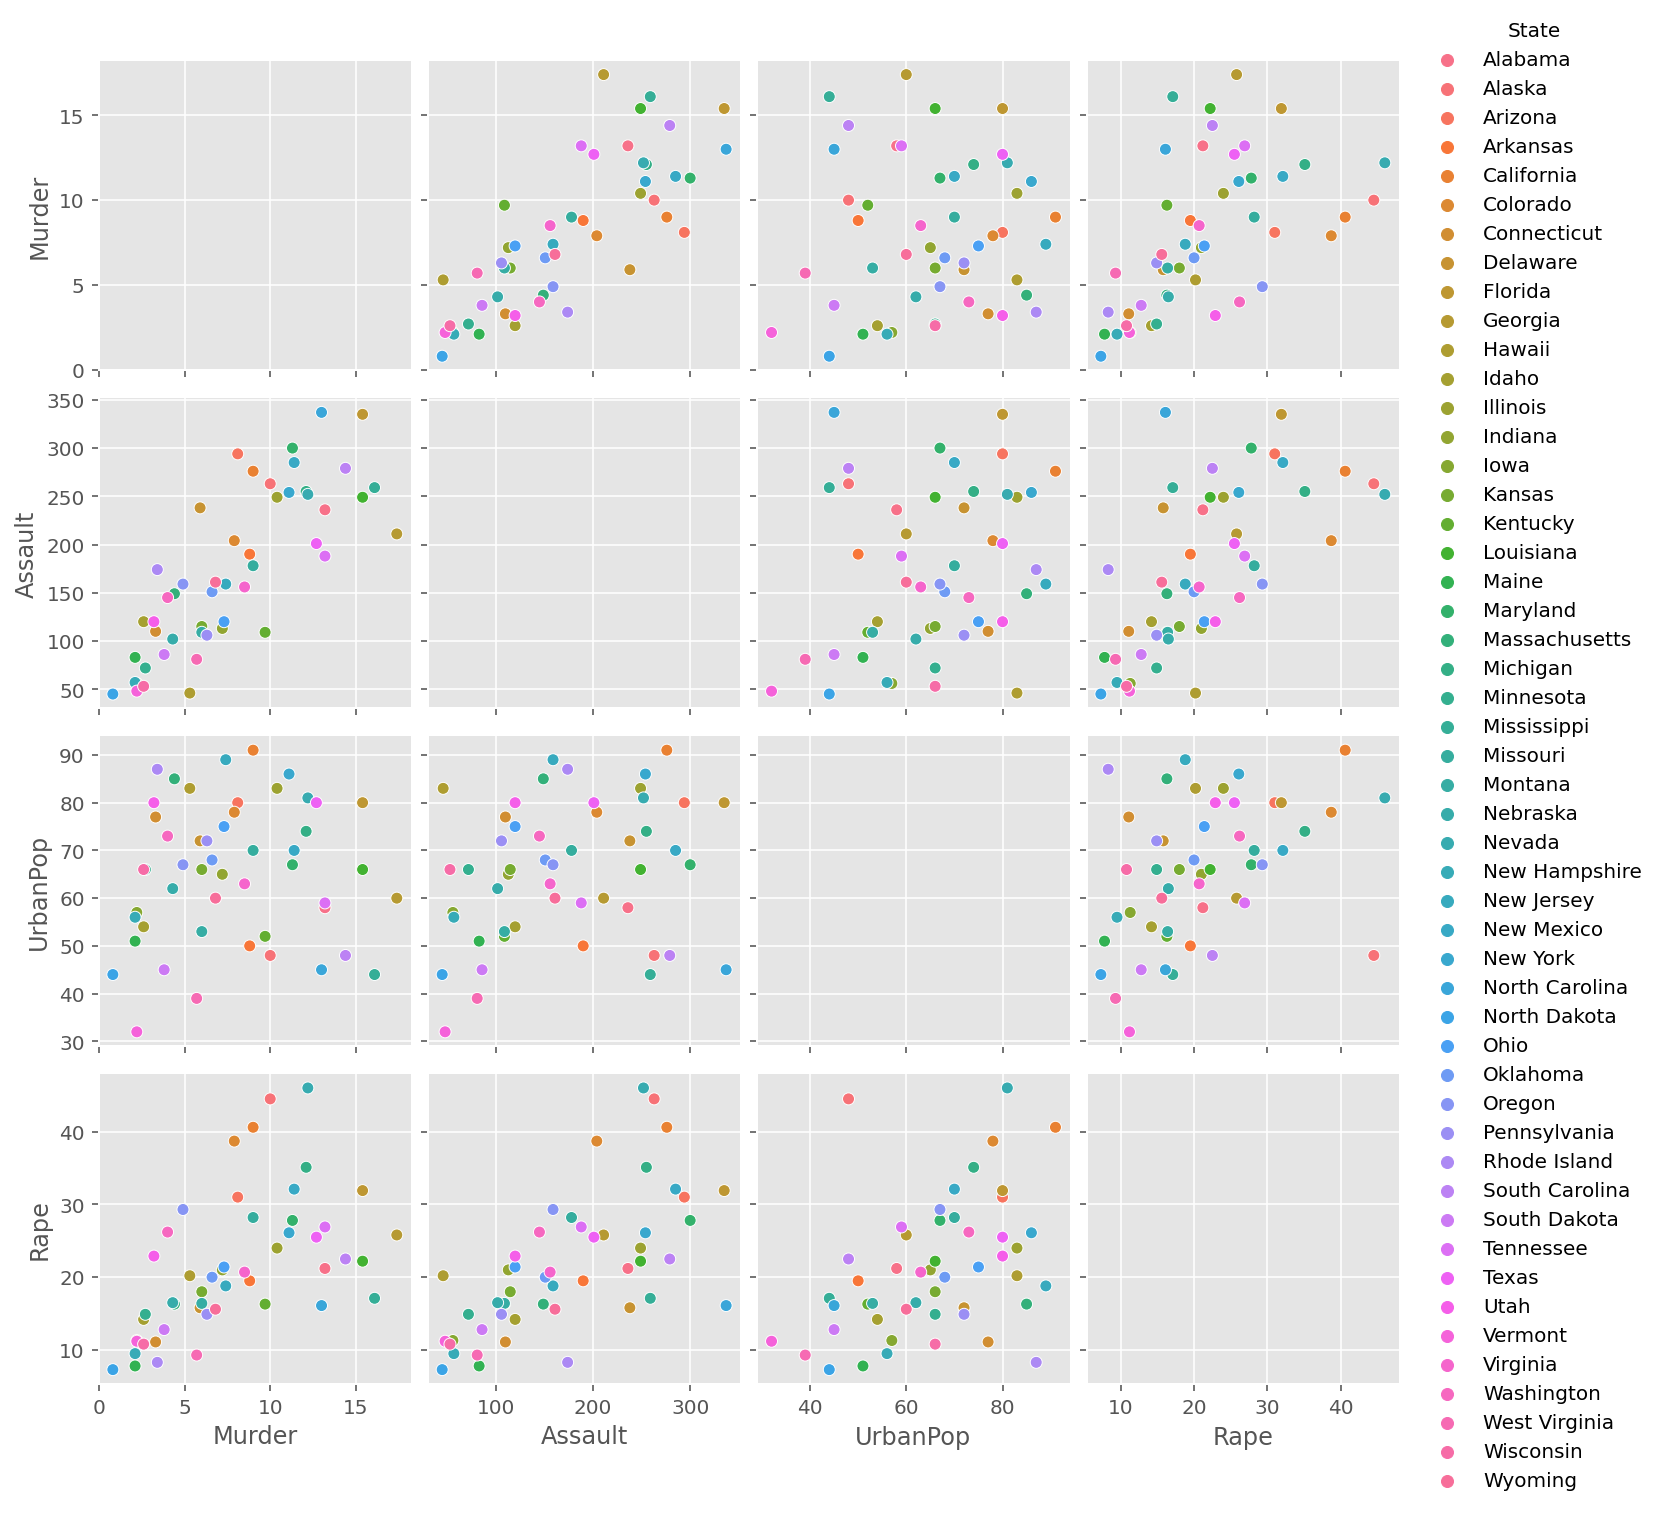

In [14]:
import seaborn as sns
sns.pairplot(data=df, hue='State')

In [6]:
columnas = list(df.columns)
columnas.remove('State')

df_crime = df[columnas]
df_crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\juanS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

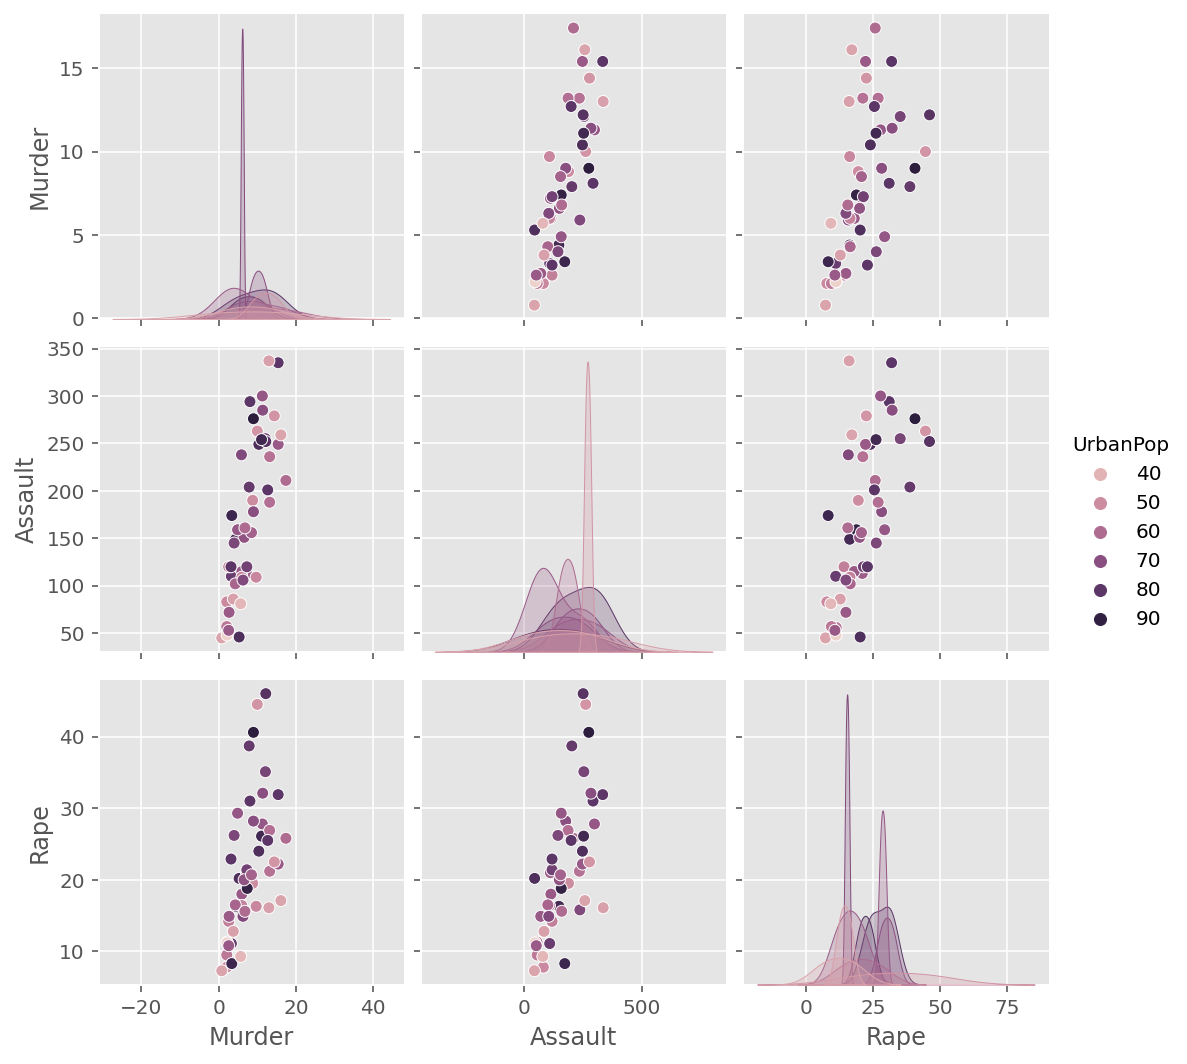

In [15]:
import seaborn as sns
sns.pairplot(data=df_crime, hue='UrbanPop')

No veo ninguna correlacion a priori. Los puntos que se generan son muy parecidos.

In [9]:
X = np.array(crime[["Murder","UrbanPop","Rape", "Assault"]])
y = np.array(crime['State'])
X.shape

(50, 4)

**Metodo para seleccion de K**

- Silhuette
- Elbow Curve (codo)

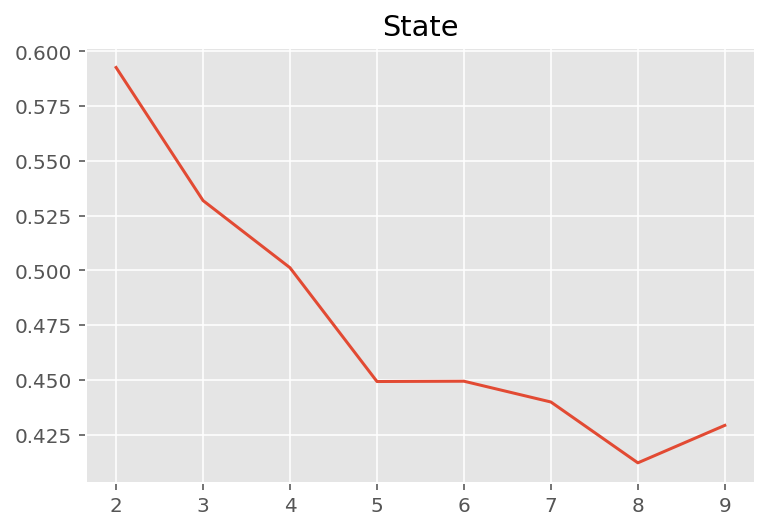

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(df_crime, 'State')

**Cnsultar:**

Como se lee el output de esta curva Silhuette?. Supongo que es para cada punto de X (k-puntos) le corresponde un valor proimedio (0 a 1) de Silhuette.

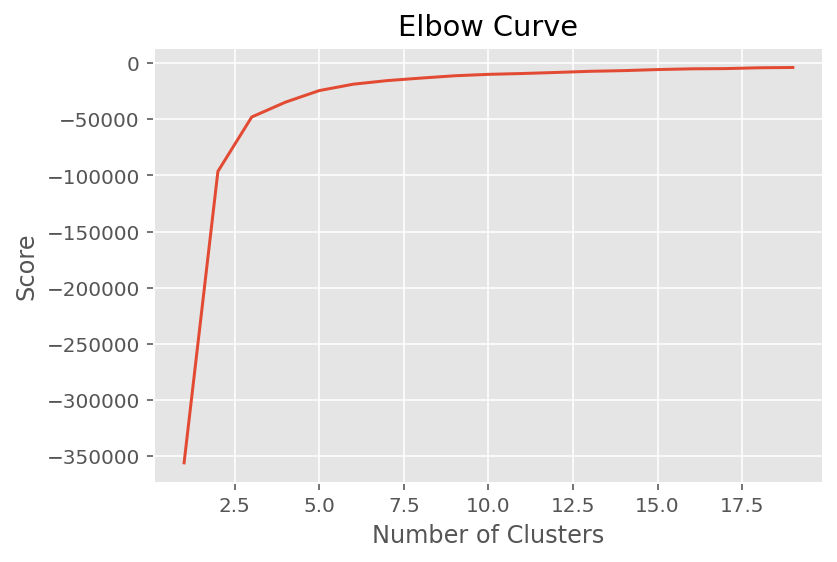

In [10]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Pareciera ser que K = 3 es un buen numero de clusters para realizar la agrupacion. 

Una de las métricas usada para comparar resultados es la *distancia media entre los puntos de datos y su centroid*. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”.

**Planteo del problema:**

Utilizaremos el algoritmo K-means para que agrupe estos estados por sus similitudes en los crimenes en el DataSet. 

Si bien tenemos 5 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. ((En casos reales, podemos utilizar todas las dimensiones que necesitemos)).

Una de las hipótesis que podríamos tener es **Ho: “Todos los Estados tienen crimenes similares”.**

#### Ejecutamos K-Means
Ejecutamos el algoritmo para 3 clusters y obtenemos las etiquetas y los centroids.

In [11]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  8.21428571  70.64285714  22.84285714 173.28571429]
 [ 11.8125      68.3125      28.375      272.5625    ]
 [  4.27        59.75        14.39        87.55      ]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

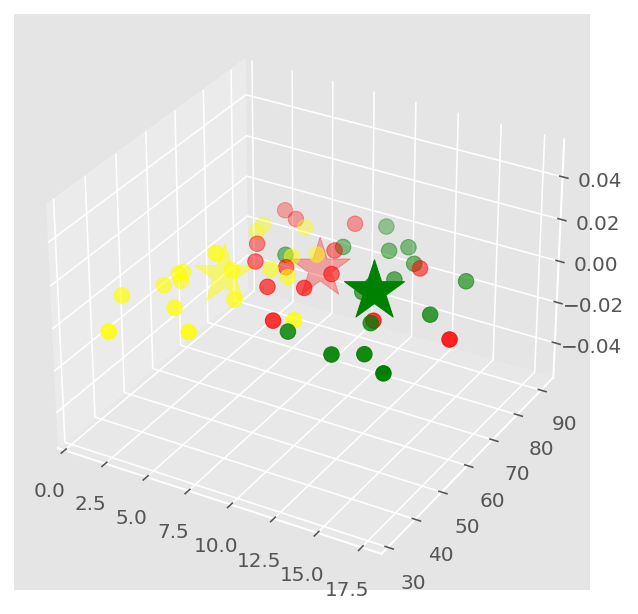

In [12]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

En la posicion del cluster rojo, hay mucha interaccion con los puntos amarillos y verdes. Puede ser que haya alguna relacion entre los clusters.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

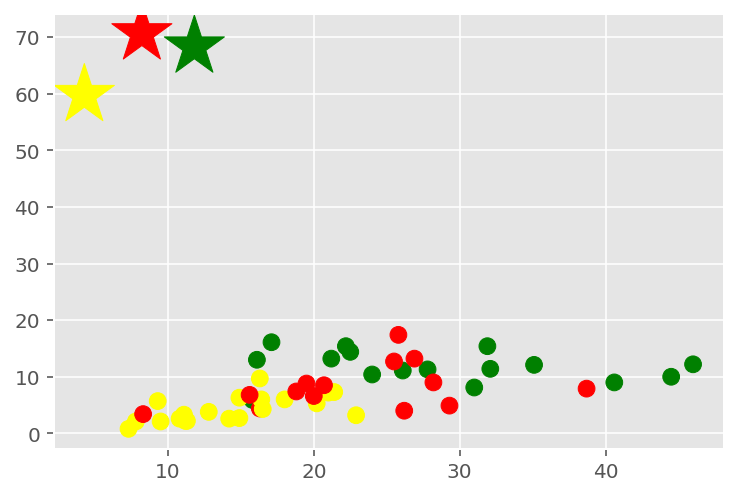

In [16]:
# Getting the values and plotting it
f1 = crime['Rape'].values
f2 = crime['Murder'].values
f3 = crime['Assault'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

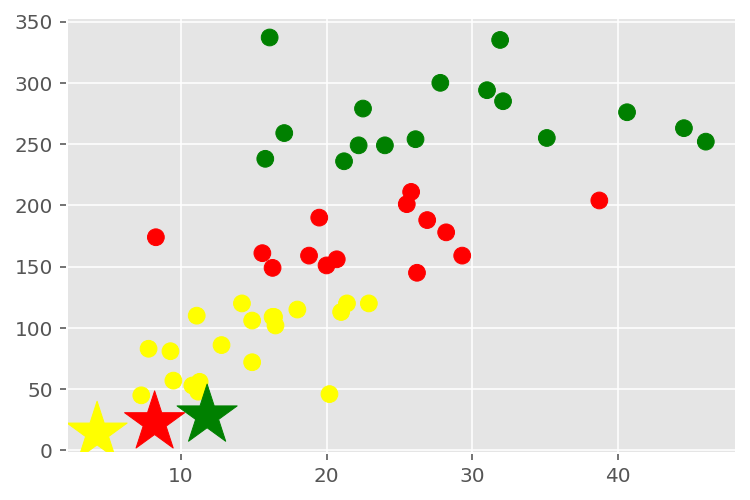

In [17]:
# Getting the values and plotting it
f1 = crime['Rape'].values
f2 = crime['Murder'].values
f3 = crime['Assault'].values

plt.scatter(f1, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

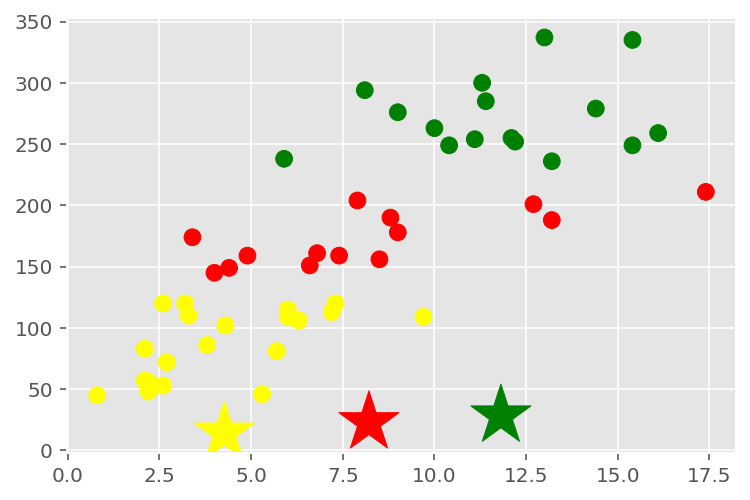

In [18]:
# Getting the values and plotting it
f1 = crime['Rape'].values
f2 = crime['Murder'].values
f3 = crime['Assault'].values

plt.scatter(f2, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas no veo que esten bien diferenciados los grupos

In [ ]:
f1 = crime['Rape'].values
f2 = crime['Murder'].values
f3 = crime['Assault'].values

In [23]:
copy =  pd.DataFrame()
copy['Rape']=crime['Rape'].values
copy['Murder']=crime['Murder'].values
copy['Murder']=crime['Murder'].values

copy['State']=crime['State'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,14
1,green,16
2,yellow,20


Podemos observar que los 3 crimenes que diferenciamos agrupan el total de estados.

In [33]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['State']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                          21,22,23,24,25,26,27,28,29,30,
                          31,32,33,34,35,36,37,38,39,40,
                          41,42,43,44,45,46,47,48,49,50]
diversidadGrupo['cantidad']=group_referrals.groupby('State').size()
diversidadGrupo

,State,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [34]:
#vemos el representante del grupo, el State cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([24, 30, 18], dtype=int64)

In [35]:
users=crime['State'].values
for row in closest:
    print(users[row])

Missouri
New Mexico
Maine
